# Classical Search Algrothim 

In [13]:
my_list=[1,3,4,2,7,8,5,6,0]
def the_oracle(my_input,number_wanted):
    wanted=number_wanted
    if my_input is wanted:
        response = True
    else:
        response = False
    return response
numberSearchedFor=6
for index,trial_number in enumerate(my_list):
    if the_oracle(trial_number,numberSearchedFor) is True:
        print("Wanted number at index ",index)

# in the worst senerio it take n times
    

Wanted number at index  7


# Quantum Search Algrothim using grover algrothim

In [14]:
from qiskit import *
import matplotlib.pyplot as pyplot
import numpy as np

In [15]:
orcale=QuantumCircuit(2,name="oracle")
orcale.cx(0,1)
orcale.to_gate()
orcale.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [18]:
backend = Aer.get_backend('statevector_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(orcale,[0,1])
grover_circuit.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [26]:
job = execute(grover_circuit,backend)
result = job.result()

C:\Users\20111\AppData\Local\Temp\ipykernel_48772\2617482166.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(grover_circuit,backend)


In [28]:
sv = result.get_statevector()
np.around(sv,2)

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

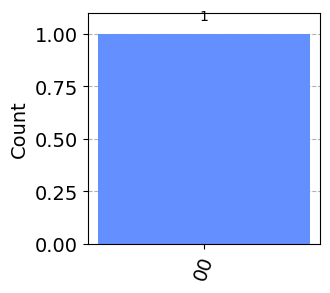

In [32]:
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts,figsize=(3,3))

In [34]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [35]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [36]:
backend = Aer.get_backend('qasm_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.append(orcale,[0,1])
grover_circuit.append(reflection,[0,1])
grover_circuit.measure([0,1],[0,1])


In [37]:
grover_circuit.draw()

┌─────────┐┌─────────────┐┌─┐   
q_0: ┤0        ├┤0            ├┤M├───
     │  oracle ││  reflection │└╥┘┌─┐
q_1: ┤1        ├┤1            ├─╫─┤M├
     └─────────┘└─────────────┘ ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

In [38]:
job=execute(grover_circuit,backend,shots=1)
result = job.result()
result.get_counts()

C:\Users\20111\AppData\Local\Temp\ipykernel_48772\3351001576.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(grover_circuit,backend,shots=1)


{'01': 1}